# Ciência e Visualização de Dados em Saúde 2020.1
### FEEC - Unicamp




In [2]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/leticia-alves-ferreira/Projeto-Atividade-Fisica-IA-386-X/master/Data/DAILY_INFORMATION.csv?token=ALTMFMDQ6VIGKVRRJKHL4VS665DS4')
#df = pd.read_csv('DAILY_INFORMATION.csv')
df.shape

deu certo


(940, 15)

### Análise Exploratória dos dados

In [ ]:
df.columns

Index(['ID', 'ACTIVITY_DATE', 'TOTAL_STEPS', 'TOTAL_DISTANCE',
       'MEAN_DAILY_MET', 'MAX_DAILY_MET', 'CALORIES', 'VERY_ACTIVE_DISTANCE',
       'MODERATE_ACTIVE_DISTANCE', 'LIGHT_ACTIVE_DIST',
       'SEDENTARY_ACTIVE_DIST', 'VERY_ACTIVE_MINUTES', 'FAIRLY_ACTIVE_MINUTES',
       'LIGHT_ACTIVE_MINUTES', 'SEDENTARY_ACTIVE_MINUTES'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        940 non-null    int64  
 1   ACTIVITY_DATE             940 non-null    object 
 2   TOTAL_STEPS               940 non-null    int64  
 3   TOTAL_DISTANCE            940 non-null    float64
 4   MEAN_DAILY_MET            934 non-null    float64
 5   MAX_DAILY_MET             934 non-null    float64
 6   CALORIES                  940 non-null    int64  
 7   VERY_ACTIVE_DISTANCE      940 non-null    float64
 8   MODERATE_ACTIVE_DISTANCE  940 non-null    float64
 9   LIGHT_ACTIVE_DIST         940 non-null    float64
 10  SEDENTARY_ACTIVE_DIST     940 non-null    float64
 11  VERY_ACTIVE_MINUTES       940 non-null    int64  
 12  FAIRLY_ACTIVE_MINUTES     940 non-null    int64  
 13  LIGHT_ACTIVE_MINUTES      940 non-null    int64  
 14  SEDENTARY_

In [ ]:
df.head()

,ID,ACTIVITY_DATE,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES
0,1503960366,04/12/2016,13162,8.50,17.53,99.0,1985,1.88,0.55,6.06,0.0,25,13,328,728
1,1503960366,04/13/2016,10735,6.97,15.87,111.0,1797,1.57,0.69,4.71,0.0,21,19,217,776
2,1503960366,04/14/2016,10460,6.74,15.69,97.0,1776,2.44,0.40,3.91,0.0,30,11,181,1218
3,1503960366,04/15/2016,9762,6.28,15.41,97.0,1745,2.14,1.26,2.83,0.0,29,34,209,726
4,1503960366,04/16/2016,12669,8.16,16.45,103.0,1863,2.71,0.41,5.04,0.0,36,10,221,773


In [ ]:
df_unique = df['ID'].unique()
print('Temos', len(df_unique), 'indivíduos no dataset')

Temos 33 indivíduos no dataset


In [ ]:
pessoas = df.groupby(['ID']).size().to_frame(name='Count').reset_index()
print('Temos em média', pessoas['Count'].mean(), 'dias de dados para cada indivíduo')
print('Max:', pessoas['Count'].max(), 'dias, Min:', pessoas['Count'].min(),'dias')
pessoas.head()

Temos em média 28.484848484848484 dias de dados para cada indivíduo
Max: 31 dias, Min: 4 dias


,ID,Count
0,1503960366,31
1,1624580081,31
2,1644430081,30
3,1844505072,31
4,1927972279,31


### Estatísticas descritivas 

In [ ]:
df.describe()

,ID,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES
count,9.400000e+02,940.000000,940.000000,934.000000,934.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,14.664090,73.595289,2303.609574,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638
std,2.424805e+09,5087.150742,3.924606,2.903374,29.970493,718.166862,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437
min,1.503960e+09,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,12.710000,58.000000,1828.500000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000
50%,4.445115e+09,7405.500000,5.245000,14.695000,74.000000,2134.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000
75%,6.962181e+09,10727.000000,7.712500,16.407500,93.000000,2793.250000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000
max,8.877689e+09,36019.000000,28.030001,25.780000,157.000000,4900.000000,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000


### Missing data

Analisando dados faltantes e inconsistentes

In [ ]:
print(df.isnull().sum())

ID                          0
ACTIVITY_DATE               0
TOTAL_STEPS                 0
TOTAL_DISTANCE              0
MEAN_DAILY_MET              6
MAX_DAILY_MET               6
CALORIES                    0
VERY_ACTIVE_DISTANCE        0
MODERATE_ACTIVE_DISTANCE    0
LIGHT_ACTIVE_DIST           0
SEDENTARY_ACTIVE_DIST       0
VERY_ACTIVE_MINUTES         0
FAIRLY_ACTIVE_MINUTES       0
LIGHT_ACTIVE_MINUTES        0
SEDENTARY_ACTIVE_MINUTES    0
dtype: int64


In [ ]:
condition = df['MEAN_DAILY_MET'].isnull() == True 
condition2 = df['MAX_DAILY_MET'].isnull() == True
print(df[condition], df[condition2])

             ID ACTIVITY_DATE  ...  LIGHT_ACTIVE_MINUTES  SEDENTARY_ACTIVE_MINUTES
30   1503960366    05/12/2016  ...                     0                      1440
345  3977333714    05/11/2016  ...                     9                        13
653  6290855005    05/10/2016  ...                     0                      1440
817  8253242879    04/30/2016  ...                     0                      1440
879  8583815059    05/12/2016  ...                     0                      1440
908  8792009665    05/10/2016  ...                     0                        48

[6 rows x 15 columns]              ID ACTIVITY_DATE  ...  LIGHT_ACTIVE_MINUTES  SEDENTARY_ACTIVE_MINUTES
30   1503960366    05/12/2016  ...                     0                      1440
345  3977333714    05/11/2016  ...                     9                        13
653  6290855005    05/10/2016  ...                     0                      1440
817  8253242879    04/30/2016  ...                     0        

Como os dados faltantes são, em sua grande maioria, de pessoas diferentes e estão espaçados nas duas colunas, completarei com os valores do dia anterior.

In [ ]:
df = df.fillna(method='ffill')
df.isnull().sum()

ID                          0
ACTIVITY_DATE               0
TOTAL_STEPS                 0
TOTAL_DISTANCE              0
MEAN_DAILY_MET              0
MAX_DAILY_MET               0
CALORIES                    0
VERY_ACTIVE_DISTANCE        0
MODERATE_ACTIVE_DISTANCE    0
LIGHT_ACTIVE_DIST           0
SEDENTARY_ACTIVE_DIST       0
VERY_ACTIVE_MINUTES         0
FAIRLY_ACTIVE_MINUTES       0
LIGHT_ACTIVE_MINUTES        0
SEDENTARY_ACTIVE_MINUTES    0
dtype: int64

Analisando colunas que possuem células iguais a zero

In [ ]:
df_0 = df.columns[(df == 0).any()]
df_0

Index(['TOTAL_STEPS', 'TOTAL_DISTANCE', 'CALORIES', 'VERY_ACTIVE_DISTANCE',
       'MODERATE_ACTIVE_DISTANCE', 'LIGHT_ACTIVE_DIST',
       'SEDENTARY_ACTIVE_DIST', 'VERY_ACTIVE_MINUTES', 'FAIRLY_ACTIVE_MINUTES',
       'LIGHT_ACTIVE_MINUTES', 'SEDENTARY_ACTIVE_MINUTES'],
      dtype='object')

In [ ]:
dict_ = {}
for col in df_0:
  condition_0 = df[col] == 0
  df_0 = df[condition_0]
  dict_[col] = len(df_0.index)

print('Coluna : # de células iguais a zero')
dict_  

Coluna : # de células iguais a zero


{'CALORIES': 4,
 'FAIRLY_ACTIVE_MINUTES': 384,
 'LIGHT_ACTIVE_DIST': 85,
 'LIGHT_ACTIVE_MINUTES': 84,
 'MODERATE_ACTIVE_DISTANCE': 386,
 'SEDENTARY_ACTIVE_DIST': 858,
 'SEDENTARY_ACTIVE_MINUTES': 1,
 'TOTAL_DISTANCE': 78,
 'TOTAL_STEPS': 77,
 'VERY_ACTIVE_DISTANCE': 413,
 'VERY_ACTIVE_MINUTES': 409}

Devido ao grande número de células com valor igual a zero, para não perder muitas amostras eu substitui estes valores pelo valor da célula anterior.

In [ ]:
df = df.replace(to_replace=0, method='ffill')
df_0 = df.columns[(df == 0).any()]
df_0


Index(['SEDENTARY_ACTIVE_DIST'], dtype='object')

Algumas células possuem valores inconsistentes, como as da coluna CALORIAS. Estes valores serão removidos.

In [ ]:
condition_0 = df['CALORIES'] > 1100
df = df[condition_0]
df.shape

(930, 15)

Analisando correlações

In [ ]:
df.corr()

,ID,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES
ID,1.000000,0.208859,0.264935,0.185704,0.102559,0.434117,0.334384,0.043471,0.037553,0.239713,0.319193,0.095500,-0.083750,-0.039486
TOTAL_STEPS,0.208859,1.000000,0.983794,0.848867,0.625321,0.566644,0.674668,0.253119,0.651348,0.101222,0.519748,0.185197,0.508123,-0.322830
TOTAL_DISTANCE,0.264935,0.983794,1.000000,0.830369,0.609379,0.627375,0.727958,0.227831,0.622900,0.100138,0.540342,0.165876,0.453699,-0.279194
MEAN_DAILY_MET,0.185704,0.848867,0.830369,1.000000,0.752896,0.668769,0.564037,0.143838,0.637847,0.147807,0.591742,0.144624,0.557315,-0.484364
MAX_DAILY_MET,0.102559,0.625321,0.609379,0.752896,1.000000,0.414120,0.469926,0.074027,0.360447,0.037575,0.414177,0.054100,0.294315,-0.364557
CALORIES,0.434117,0.566644,0.627375,0.668769,0.414120,1.000000,0.443677,0.056411,0.423612,0.109966,0.541455,0.117741,0.212182,-0.172375
VERY_ACTIVE_DISTANCE,0.334384,0.674668,0.727958,0.564037,0.469926,0.443677,1.000000,-0.011130,0.112685,0.009652,0.779478,-0.007058,0.011819,-0.042328
MODERATE_ACTIVE_DISTANCE,0.043471,0.253119,0.227831,0.143838,0.074027,0.056411,-0.011130,1.000000,0.097163,0.035494,-0.018441,0.906053,0.034539,-0.145822
LIGHT_ACTIVE_DIST,0.037553,0.651348,0.622900,0.637847,0.360447,0.423612,0.112685,0.097163,1.000000,0.172487,0.014581,0.030345,0.864214,-0.395908
SEDENTARY_ACTIVE_DIST,0.239713,0.101222,0.100138,0.147807,0.037575,0.109966,0.009652,0.035494,0.172487,1.000000,0.028159,0.010397,0.201551,-0.322599


### Feature Engineering

In [ ]:
df['TOTAL_ACTIVE_MINUTES'] = df.iloc[:,10:15].sum(axis=1)
df['TOTAL_ACTIVE_DISTANCE'] = df.iloc[:,6:10].sum(axis=1)
df.shape

(930, 17)

In [ ]:
df['%_ACTIVE_MINUTES'] = (df['VERY_ACTIVE_MINUTES'] / df['TOTAL_ACTIVE_MINUTES'])*100
df['%_ACTIVE_DISTANCE'] = (df['VERY_ACTIVE_DISTANCE'] / df['TOTAL_ACTIVE_DISTANCE'])*100
df.shape

(930, 19)

Um dia possui 1440 minutos, então vou eliminar valores que se distanciam demais do valor esperado porque provavelmente foram coletados de maneira errônea. Os valores acima de 1440 minutos foram substituídos pelo valor 1440.

In [ ]:
df['TOTAL_ACTIVE_MINUTES'] = np.where((df['TOTAL_ACTIVE_MINUTES'] > 1440), 1440, df.TOTAL_ACTIVE_MINUTES)
condition_0 = df['TOTAL_ACTIVE_MINUTES'] > 500
df = df[condition_0]
df.shape

(924, 19)

In [ ]:
condition_0 = df['TOTAL_STEPS'] > 100
df = df[condition_0]
df.shape

(895, 19)

Após criar novos atributos, vamos tentar separar os indivíduos em 2 grupos diferentes baseados no nível de sedentarismo utilizando estes atributos. 

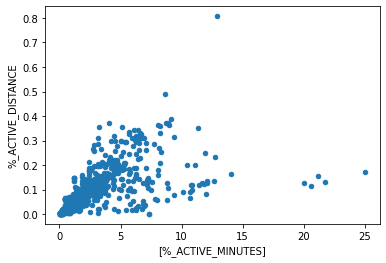

In [ ]:
df.plot(x=['%_ACTIVE_MINUTES'], y='%_ACTIVE_DISTANCE',kind='scatter')


Analisando o Scatter Plot acima não está claro se existem 2 grupos distintos. Vamos agora analisar a média dos valores para cada indivíduo

In [ ]:
df_mean = df.groupby(['ID']).mean()
df_mean.head()


,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES,TOTAL_ACTIVE_MINUTES,TOTAL_ACTIVE_DISTANCE,%_ACTIVE_MINUTES,%_ACTIVE_DISTANCE
ID,,,,,,,,,,,,,,,,,
1503960366,12528.677419,8.071935,16.699355,97.935484,1873.935484,2.940968,0.826774,4.299677,0.000000,39.870968,19.903226,228.032258,848.161290,1125.967742,1882.002903,3.564987,0.155104
1624580081,5836.333333,3.981000,12.534000,70.333333,1499.400000,2.164333,0.888667,2.629667,0.012000,22.100000,14.166667,155.033333,1270.000000,1440.000000,1505.082667,1.511019,0.124749
1644430081,7282.966667,5.295333,14.065667,76.500000,2811.300000,0.985333,1.547667,3.609000,0.010667,12.966667,35.133333,178.466667,1161.866667,1376.102000,2817.442000,0.932406,0.034154
1844505072,4247.380952,2.807619,12.573810,50.476190,1693.666667,0.303810,0.510952,2.710000,0.010000,4.380952,12.666667,184.904762,1188.571429,1355.906667,1697.191429,0.351444,0.017085
1927972279,1533.516129,1.061290,10.640968,33.000000,2172.806452,0.367742,0.307419,0.933871,0.010000,5.193548,7.580645,66.387097,1317.419355,1361.905806,2174.415484,0.370161,0.017231


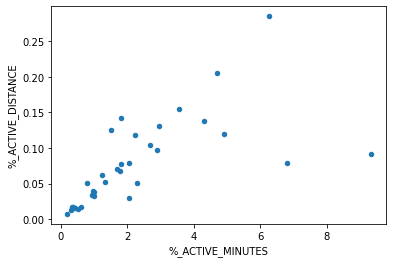

In [ ]:
df_mean.plot(x='%_ACTIVE_MINUTES', y='%_ACTIVE_DISTANCE',kind='scatter')

Agora conseguimos visualizar a separação entre grupos, mas para uma análise mais aprofundada vamos rodar um algoritmo de clusterização para ver o resultado.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

### Clusterização

In [ ]:
X = df.iloc[:,17:19].values
X = np.nan_to_num(X)
# Normalization
Clus_dataSet = StandardScaler().fit_transform(X)
clusterNum = 2  # Number of Clusters
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20)
k_means.fit(X)
labels = k_means.labels_

X2 = df_mean.iloc[:,15:17].values
X2 = np.nan_to_num(X2)
# Normalization
Clus_dataSet2 = StandardScaler().fit_transform(X2)
clusterNum = 2  # Number of Clusters
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 40)
k_means.fit(X2)
labels2 = k_means.labels_

Clusterização com valores diários

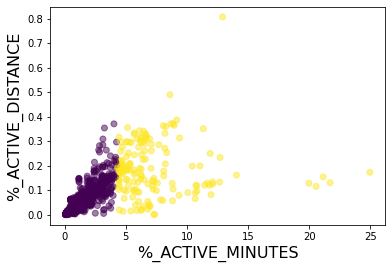

In [ ]:
plt.scatter(X[:, 0], X[:, 1],  c=labels.astype(np.float), alpha=0.5)
plt.xlabel('%_ACTIVE_MINUTES', fontsize=16)
plt.ylabel('%_ACTIVE_DISTANCE', fontsize=16)

plt.show()

Clusterização com valores médios

Text(0, 0.5, '%_ACTIVE_DISTANCE')

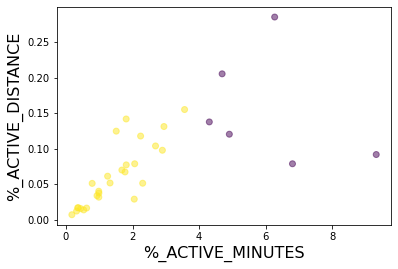

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels2.astype(np.float), alpha=0.5)
plt.xlabel('%_ACTIVE_MINUTES', fontsize=16)
plt.ylabel('%_ACTIVE_DISTANCE', fontsize=16)

Acrescentando uma nova dimensão a nossa clusterização

In [ ]:
X3 = df_mean[['CALORIES', '%_ACTIVE_DISTANCE', '%_ACTIVE_MINUTES']].values
X3 = np.nan_to_num(X3)
# Normalization
Clus_dataSet3 = StandardScaler().fit_transform(X)
clusterNum = 2  # Number of Clusters
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 40)
k_means.fit(X3)
labels3 = k_means.labels_

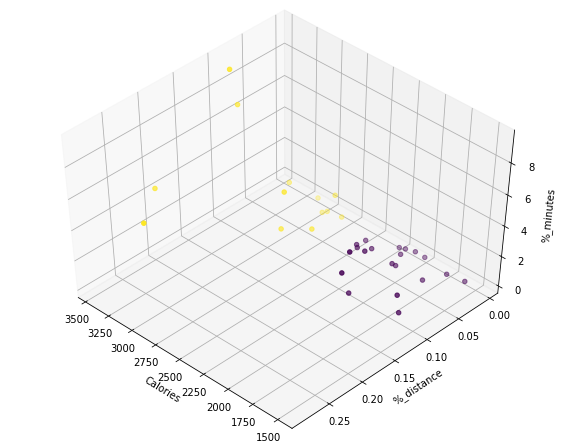

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

ax.set_xlabel('Calories')
ax.set_ylabel('%_distance')
ax.set_zlabel('%_minutes')

ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c= labels3.astype(np.float))
plt.show()

In [ ]:
df_mean["Cluster_label"] = labels3
df_cluster = df_mean.groupby(['Cluster_label']).mean()
df_cluster

,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES,TOTAL_ACTIVE_MINUTES,TOTAL_ACTIVE_DISTANCE,%_ACTIVE_MINUTES,%_ACTIVE_DISTANCE
Cluster_label,,,,,,,,,,,,,,,,,
0,6827.334679,4.638165,13.900534,69.757081,1938.490867,1.308263,0.814253,3.242954,0.022942,17.864158,19.253454,208.355007,997.277867,1224.284184,1943.856337,1.510887,0.067784
1,9896.138030,7.505609,15.985338,83.514400,2941.815395,2.904725,0.941524,4.131568,0.022996,41.833245,24.481307,206.139316,1005.464115,1261.033655,2949.793212,3.502526,0.093915


Através dos valores médios dos atributos do conjunto de dados podemos ver claramente que dois grupos distintos foram criados de acordo com o nível de sedentarismo. Principalmente se compararmos colunas como CALORIES, VERY_ACTIVE_DISTANCE, VERY_ACTIVE_MINUTES e outras.

In [ ]:
group = df_mean.groupby(['Cluster_label']).size().to_frame(name='Count').reset_index()
group

,Cluster_label,Count
0,0,20
1,1,13


Agora que separamos os usuários em 2 grupos, podemos treinar um classificador para acrescentar novos usuários em cada um dos grupos

In [ ]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df["Cluster_label"] = labels
df.tail()

,ID,ACTIVITY_DATE,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES,TOTAL_ACTIVE_MINUTES,TOTAL_ACTIVE_DISTANCE,%_ACTIVE_MINUTES,%_ACTIVE_DISTANCE,Cluster_label
935,8877689391,05/08/2016,10686,8.110000,16.16,88.0,2847,1.08,0.20,6.80,0.01,17,4,245,1174,1440.00,2855.08,1.180547,0.037827,0
936,8877689391,05/09/2016,20226,18.250000,21.01,139.0,3710,11.10,0.80,6.24,0.05,73,19,217,1131,1440.00,3728.14,5.069268,0.297736,1
937,8877689391,05/10/2016,10733,8.150000,16.07,98.0,2832,1.35,0.46,6.28,0.05,18,11,224,1187,1440.00,2840.09,1.249957,0.047534,0
938,8877689391,05/11/2016,21420,19.559999,21.75,141.0,3832,13.22,0.41,5.89,0.05,88,12,213,1127,1440.00,3851.52,6.110899,0.343241,1
939,8877689391,05/12/2016,8064,6.120000,16.28,88.0,1849,1.82,0.04,4.25,0.05,23,1,137,770,931.05,1855.11,2.470329,0.098107,0


In [ ]:
group2 = df.groupby(['Cluster_label']).size().to_frame(name='Count').reset_index()
group2

,Cluster_label,Count
0,0,732
1,1,163


Como as classes estão desbalanceadas, eu vou remover boa parte dos exemplos do cluster 0

In [ ]:
from sklearn.utils import shuffle
condition0 = df['Cluster_label'] == 0
condition1 = df['Cluster_label'] == 1
df_0 = df[condition0]
df_1 = df[condition1]
df_0 = shuffle(df_0)
df_train = pd.concat([df_1, df_0.tail(163)])
df_train.head()

,ID,ACTIVITY_DATE,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES,TOTAL_ACTIVE_MINUTES,TOTAL_ACTIVE_DISTANCE,%_ACTIVE_MINUTES,%_ACTIVE_DISTANCE,Cluster_label
5,1503960366,04/17/2016,9705,6.48,15.26,95.0,1728,3.19,0.78,2.51,0.0,38,20,164,539,761.0,1734.48,4.993430,0.183917,1
7,1503960366,04/19/2016,15506,9.88,17.97,109.0,2035,3.53,1.32,5.03,0.0,50,31,264,775,1120.0,2044.88,4.464286,0.172626,1
10,1503960366,04/22/2016,12764,8.13,16.14,93.0,1827,4.76,1.12,2.24,0.0,66,27,130,1217,1440.0,1835.12,4.583333,0.259384,1
13,1503960366,04/25/2016,15355,9.80,17.78,95.0,2013,5.29,0.57,3.94,0.0,73,14,216,814,1117.0,2022.80,6.535363,0.261519,1
15,1503960366,04/27/2016,18134,12.21,19.06,97.0,2159,6.40,0.41,5.41,0.0,78,11,243,1108,1440.0,2171.22,5.416667,0.294765,1


In [ ]:
group3 = df_train.groupby(['Cluster_label']).size().to_frame(name='Count').reset_index()
group3

,Cluster_label,Count
0,0,163
1,1,163


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
X = df_train.iloc[:, 2:-1].values
X = np.nan_to_num(X)
y = df_train.iloc[:,-1:]
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.1, random_state=4, shuffle = True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (293, 17) (293, 1)
Test set: (33, 17) (33, 1)


In [ ]:
kernel_list = ['rbf', 'poly', 'linear']
for kernel in kernel_list:
    # CREATE MODEL
    clf = svm.SVC(kernel=kernel, gamma = 'scale')  
    clf.fit(X_train, y_train)
    # Predict
    yhat = clf.predict(X_test)
    print('KERNEL:', kernel)
    print('')
    print (classification_report(y_test, yhat))

KERNEL: rbf

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.95      0.95      0.95        19

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33

KERNEL: poly

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.95      0.95      0.95        19

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33

KERNEL: linear

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.95      0.95      0.95        19

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Analisando os resultados vemos que a melhor performance é obtida utilizando-se o kernel linear. O próximo passo é utilizar o nosso modelo SVM para classificar os indivíduos entre sedentários e não sedentários em um novo data set.

In [7]:
df_test = pd.read_csv('https://raw.githubusercontent.com/leticia-alves-ferreira/Projeto-Atividade-Fisica-IA-386-X/master/Data/DAILY_INFO_TEST.csv?token=ALTMFMH7XBCTIWOJEW3KEIK665D4O')
#df_test = pd.read_csv('DAILY_INFO_TEST.csv')
df_test.shape

(428, 15)

In [ ]:
df_test['TOTAL_ACTIVE_MINUTES'] = df_test.iloc[:,10:15].sum(axis=1)
df_test['TOTAL_ACTIVE_DISTANCE'] = df_test.iloc[:,6:10].sum(axis=1)
df_test['%_ACTIVE_MINUTES'] = (df_test['VERY_ACTIVE_MINUTES'] / df_test['TOTAL_ACTIVE_MINUTES'])*100
df_test['%_ACTIVE_DISTANCE'] = (df_test['VERY_ACTIVE_DISTANCE'] / df_test['TOTAL_ACTIVE_DISTANCE'])*100
df_test.shape

(428, 19)

In [ ]:
df_unique_1 = df['ID'].unique()
df_unique_2 = df_test['ID'].unique()

Selecionando os indivíduos que não se encontram no data set utilizado para treinamento

In [ ]:
new_id = list(set(df_unique_2) - set(df_unique_1))
print('Os indivíduos',new_id[0],'e',new_id[1], 'não foram utilizados durante o treinamento')

Os indivíduos 2891001357 e 6391747486 não foram utilizados para o treinamento


In [ ]:
test_condition = df_test['ID'] == 6391747486 
test_condition2 = df_test['ID'] == 2891001357
new_df_test = df_test[test_condition]
# Missing data
new_df_test = new_df_test.replace(to_replace=0, method='ffill')
new_df_test = new_df_test.replace(to_replace=0, method='bfill')

new_df_test2 = df_test[test_condition2]
new_df_test = pd.concat([new_df_test, new_df_test2],axis = 0)

df_test_mean = new_df_test.groupby(['ID']).mean()
df_test_mean


,TOTAL_STEPS,TOTAL_DISTANCE,MEAN_DAILY_MET,MAX_DAILY_MET,CALORIES,VERY_ACTIVE_DISTANCE,MODERATE_ACTIVE_DISTANCE,LIGHT_ACTIVE_DIST,SEDENTARY_ACTIVE_DIST,VERY_ACTIVE_MINUTES,FAIRLY_ACTIVE_MINUTES,LIGHT_ACTIVE_MINUTES,SEDENTARY_ACTIVE_MINUTES,TOTAL_ACTIVE_MINUTES,TOTAL_ACTIVE_DISTANCE,%_ACTIVE_MINUTES,%_ACTIVE_DISTANCE
ID,,,,,,,,,,,,,,,,,
2891001357,2063.000000,1.610000,11.670000,20.000000,1144.000000,0.00,0.00,1.610000,0.0,0.0,0.0,630.000000,99.000000,729.0,1145.610000,0.000000,0.000000
6391747486,2092.222222,1.794444,10.643333,26.666667,1763.111111,2.03,0.05,4.202222,0.0,46.0,6.0,170.777778,1261.888889,1302.0,1764.185556,3.194444,0.091194


Preparando os dados para inferência

In [ ]:
df_norm = pd.concat([df_train.iloc[:, 2:-1], df_test_mean], axis = 0)
df_norm.shape

(328, 17)

In [ ]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm_test = scaler.fit_transform(df_norm.values)
X_norm_test.shape

(328, 17)

Classificando os novos indivíduos

In [ ]:
yhat = clf.predict(X_norm_test[-1].reshape(1,17))
print('O indivíduo de ID = 6391747486 pertence ao grupo', str(yhat))

O indivíduo de ID = 6391747486 pertence ao grupo [0]


In [ ]:
yhat = clf.predict(X_norm_test[-2].reshape(1,17))
print('O indivíduo de ID = 2891001357 pertence ao grupo', str(yhat))

O indivíduo de ID = 2891001357 pertence ao grupo [0]


Agora vamos plotar novamente nosso gráfico com a clusterização para ver onde o indivíduo de ID = 6391747486 está localizado.

In [ ]:
df_mean["Cluster_label"] = labels2
df_mean_new = pd.concat([df_mean, df_test_mean], axis = 0)
df_mean_new.drop(df_mean_new.index[[-2]], inplace = True)
df_mean_new = df_mean_new.fillna(2)
#df_mean_new.tail()

Text(0, 0.5, '%_ACTIVE_DISTANCE')

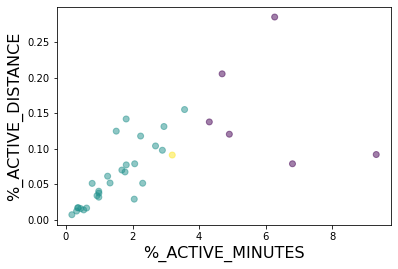

In [ ]:
plt.scatter(df_mean_new['%_ACTIVE_MINUTES'], df_mean_new['%_ACTIVE_DISTANCE'], c=df_mean_new['Cluster_label'].astype(np.float), alpha=0.5)
plt.xlabel('%_ACTIVE_MINUTES', fontsize=16)
plt.ylabel('%_ACTIVE_DISTANCE', fontsize=16)

Analisando o gráfico podemos ver que a classificação foi coerente em relação aos outros indivíduos pertencentes ao conjunto de dados de treinamento.

In [ ]:
df_mean["Cluster_label"] = labels3
df_mean_new2 = pd.concat([df_mean, df_test_mean], axis = 0)
df_mean_new2.drop(df_mean_new2.index[[-2]], inplace = True)
df_mean_new2 = df_mean_new2.fillna(2)



In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_mean_new2, x='CALORIES', y='%_ACTIVE_DISTANCE', z='%_ACTIVE_MINUTES',
              color='Cluster_label')
fig.show()